In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, gzip
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split

## Exercise 1

Load MNIST and train an RBM. Remember to **normalize** pixel luminosities to the [0-1] interval.

In [99]:

mnist = pd.read_csv("data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=mnist[:,1:785]/255.
y=mnist[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("dimension de las imagenes y las clases", X.shape, y.shape)
numbers_X = X
numbers_y = y


dimension de las imagenes y las clases (1500, 784) (1500,)


the following code counts the numbers of instances for each digit and a sample of the dataset.

In [100]:
print("TRAIN numbers class distribution")
pd.DataFrame(pd.Series(numbers_y).value_counts()).T


TRAIN numbers class distribution


,2,1,7,6,4,0,9,8,5,3
0,186,157,154,152,151,150,146,141,138,125


In [101]:
def show_linearized_images_sample(X, n_images=200, permutation=True):
    plt.figure(figsize=(18,8))
    Xp = np.random.permutation(X) if permutation else X
    img =  np.rollaxis(np.rollaxis(Xp[:n_images].reshape(20, -1, 28, 28), 0, 2), 1, 3).reshape(-1, 20 * 28)
    plt.imshow(img, cmap=plt.cm.Greys_r)
    plt.axis("off")

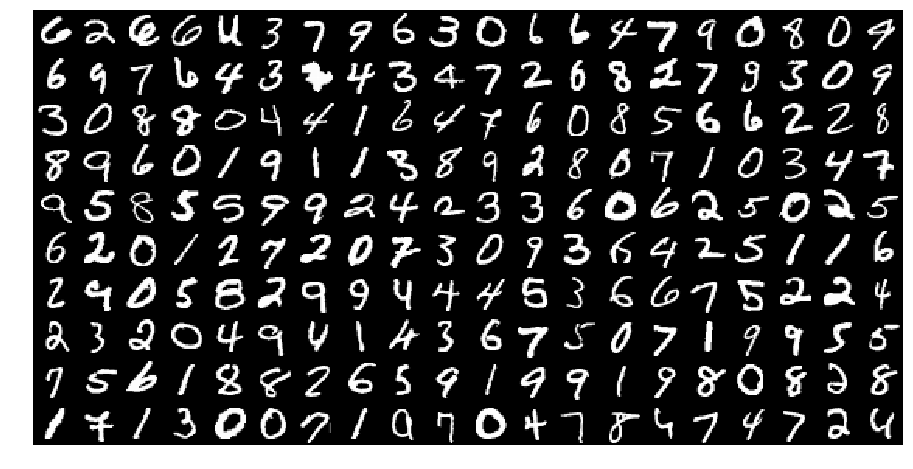

In [102]:
show_linearized_images_sample(numbers_X)


create and train an RBM with 100 components, batch_size 5, learning_rate 0.1 and 100 iterations with `numbers_X`

In [103]:
from sklearn.neural_network import BernoulliRBM

dim_H = 100

rbm = BernoulliRBM(n_components=dim_H, batch_size=5, learning_rate=.01,n_iter=100, random_state=None, verbose=0)
rbm.fit(X_train);
c, b, W = rbm.intercept_visible_, rbm.intercept_hidden_, rbm.components_



### obtain the `W` matrix and plot the 100 components from the trained RBM (matrix `W`)

you should see something approximately like this

![alt text](./Images/lab_rbm_components.png)

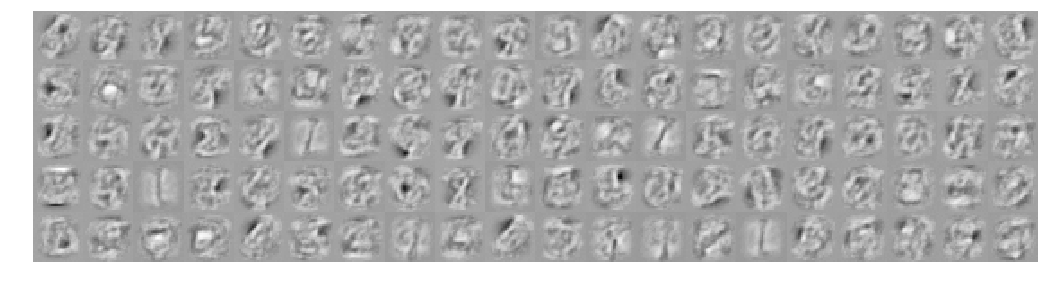

In [104]:
show_linearized_images_sample(W, n_images=len(W))

## Exercise 2

- Load into `fashion_X` 1500 fashion MNIST images and do not forget to normalize their luminosity to the  [0-1] interval.
- Create 1500 random noise images into a variable named `random_imgs` (use `np.random.random(size=(1500,784))`) and set to zero any value under 0.7
- Use the previously trained RBM to compute the free energy of all elements in `fashion_X`, `number_X` , `number_X_sel` and `random_imgs`.
- Plot the histograms. You should see a clear separation of the four datasets.

Your histogram should look roughly like this

![alt text](./Images/lab_rbm_histograms.png)



In [105]:
#!pip install keras

In [106]:
from keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [107]:
fashion_X = X_train[:1500]/255
fashion_X[1,:100] #Comprobamos que si este entre [0-1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
       0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00392157, 0.        , 0.        , 0.        ,
       0.19215686, 0.53333333, 0.85882353, 0.84705882, 0.89411765,
       0.9254902 , 1.        , 1.        , 1.        , 1.        ,
       0.85098039, 0.84313725, 0.99607843, 0.90588235, 0.62745098,
       0.17647059, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05490196, 0.69019608, 0.87058824, 0.87843137,
       0.83137255, 0.79607843, 0.77647059, 0.76862745, 0.78431373,
       0.84313725, 0.8       , 0.79215686, 0.78823529, 0.78823

In [108]:
fashion_X.shape

(1500, 784)

In [109]:
random_imgs = np.random.random(size=(1500,784))
random_imgs[0,:10]

array([0.14531645, 0.08522202, 0.27487523, 0.8996513 , 0.93618992,
       0.60236402, 0.38370146, 0.43855673, 0.02903592, 0.23903328])

In [110]:
random_imgs[random_imgs<0.7]=0
random_imgs[0,:10]

array([0.        , 0.        , 0.        , 0.8996513 , 0.93618992,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [111]:
def free_energy(v,c,b,W):
    return - v.dot(c)- np.logaddexp(0, v.dot(W.T) + b).sum() 

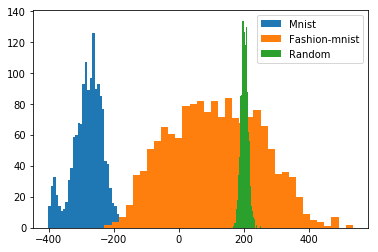

In [112]:
enerMnist=np.r_[[free_energy(i,c,b,W) for i in numbers_X[:1500]]]
enerFash=np.r_[[free_energy(i,c,b,W) for i in fashion_X]]
enerRand=np.r_[[free_energy(i,c,b,W) for i in random_imgs]]
plt.hist(enerMnist,bins=35,label='Mnist');
plt.hist(enerFash,bins=35,label='Fashion-mnist');
plt.hist(enerRand,bins=35,label='Random');
plt.legend()


In [113]:
enerFash.shape,enerMnist.shape,enerRand.shape

((1500,), (1500,), (1500,))

### Se observa como se separan los 3 datasets segun la energia libre, siendo la menor la perteneciente al MNIST con el cual se entreno la RBM

## Exercise 3: 

Select a random set of 40 digits and perform a 100 steps Gibbs sampling for each one of them. 

Follow the example here: https://www.kaggle.com/nicw102168/restricted-boltzmann-machine-rbm-on-mnist

Your generation might look like:

![alt text](./Images/lab_rbm_generated.png)




In [114]:
def gen_mnist_image(X):
    return np.rollaxis(np.rollaxis(X[0:200].reshape(20, -1, 28, 28), 0, 2), 1, 3).reshape(-1, 20 * 28)

<Figure size 720x1440 with 0 Axes>

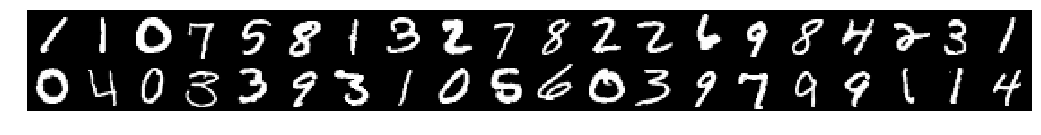

In [126]:
xx = numbers_X[:40].copy()
plt.figure(figsize=(10,20));
show_linearized_images_sample(xx, len(xx), permutation=False);

<Figure size 720x1440 with 0 Axes>

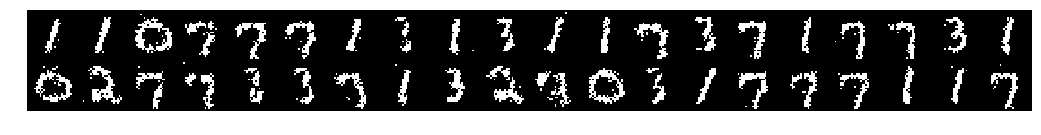

In [127]:
for ii in range(100):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])
plt.figure(figsize=(10,20))
show_linearized_images_sample(xx, len(xx), permutation=False)

## Exercise 4

Select a simple sklearn classification method (such as GaussianNB or LogisticRegression), make a random train/test split of 50% on MNIST digits and then:

- train and measure the performance of your selected method directly with the raw MNIST data
- train and measure the perofrmance of your selected method **after** transforming MNIST data with the previously trained RBM

you should see some improvement after transforming the data.

<Figure size 720x1440 with 0 Axes>

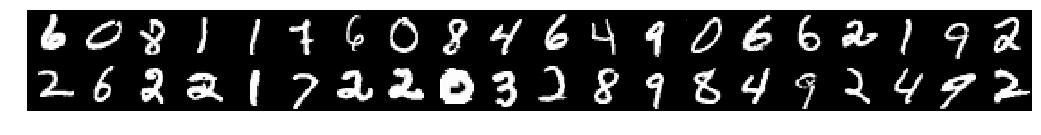

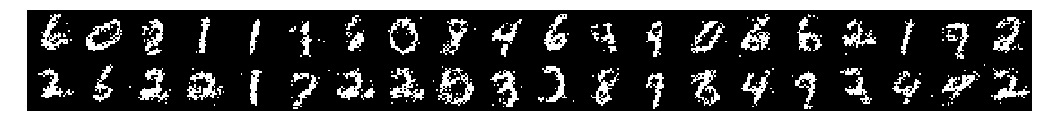

In [123]:
xx1=X.copy()
for ii in range(100):
    for n in range(len(X)):
        xx1[n] = rbm.gibbs(X[n])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(xx1, y, test_size=0.33, random_state=42)

plt.figure(figsize=(10,20))

show_linearized_images_sample(X_train[:40], len(X_train), permutation=False)

show_linearized_images_sample(X_train1[:40], len(xx), permutation=False)

In [124]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

nB=GaussianNB()
lr=LogisticRegression()
nB.fit(X_train,y_train)
lr.fit(X_train,y_train)
y_test_pred=nB.predict(X_test)
score=accuracy_score(y_test,y_test_pred)
print("Data set original")
print(str(score)+"% Naive Bayes")
y_test_pred=lr.predict(X_test)
score=accuracy_score(y_test,y_test_pred)
print(str(score)+"% Logistic Reg")


Data set original
0.5434343434343434% Naive Bayes
0.8505050505050505% Logistic Reg


In [125]:
nB=GaussianNB()
lr=LogisticRegression()
nB.fit(X_train1,y_train1)
lr.fit(X_train1,y_train1)
y_test_pred=nB.predict(X_test1)
score=accuracy_score(y_test1,y_test_pred)
print("Data set transformado")
print(str(score)+"% Naive Bayes")
y_test_pred=lr.predict(X_test1)
score=accuracy_score(y_test1,y_test_pred)
print(str(score)+"% Logistic Reg")

Data set transformado
0.5353535353535354% Naive Bayes
0.7717171717171717% Logistic Reg
